In [12]:
import numpy as np
import pandas as pd
from datasets import Dataset
from transformers import TrainingArguments
from transformers import Trainer


# import data

In [13]:
raw_data = pd.read_csv('training_data.csv')

In [14]:
raw_data[:10]

,submission_id,submitted_answer,submission_time,exercise_id,is_correct,student_id,category
0,1409,SELECT SUM(first_name)\r\nFROM person \r\nWHER...,2018-08-22 09:03:34.219155+10,1,0,240,noninterpretable
1,53,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,2018-08-10 12:31:49.231881+10,1,1,12,correct
2,54,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,2018-08-10 12:32:19.970559+10,1,1,12,correct
3,55,SELECT COUNT(*) FROM (SELECT person.id FROM pe...,2018-08-10 12:35:12.280294+10,1,0,12,partially correct
4,56,"SELECT production_year, COUNT(*) FROM movie \r...",2018-08-10 12:48:24.607193+10,2,1,12,correct
5,57,SELECT COUNT(*) FROM person\r\nWHERE person.id...,2018-08-10 12:51:54.063001+10,12,1,12,correct
6,58,"SELECT p.id, p.first_name, p.last_name FROM pe...",2018-08-10 13:01:57.66289+10,4,1,12,correct
7,59,"SELECT mw.title, mw.production_year\r\nFROM (m...",2018-08-10 13:08:43.24407+10,5,1,12,correct
8,60,SELECT country FROM restriction\r\nWHERE LOWER...,2018-08-10 14:56:33.969809+10,6,1,12,correct
9,61,"SELECT id, first_name, last_name FROM person\r...",2018-08-10 14:59:15.472475+10,7,1,12,correct


In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12899 entries, 0 to 12898
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   submission_id     12899 non-null  int64 
 1   submitted_answer  12897 non-null  object
 2   submission_time   12899 non-null  object
 3   exercise_id       12899 non-null  int64 
 4   is_correct        12899 non-null  int64 
 5   student_id        12899 non-null  int64 
 6   category          12899 non-null  object
dtypes: int64(4), object(3)
memory usage: 705.5+ KB


In [16]:
df = raw_data.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12897 entries, 0 to 12898
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   submission_id     12897 non-null  int64 
 1   submitted_answer  12897 non-null  object
 2   submission_time   12897 non-null  object
 3   exercise_id       12897 non-null  int64 
 4   is_correct        12897 non-null  int64 
 5   student_id        12897 non-null  int64 
 6   category          12897 non-null  object
dtypes: int64(4), object(3)
memory usage: 806.1+ KB


In [17]:
df = df.drop(['submission_id', 'category', 'submission_time', 'exercise_id', 'student_id', 'category'], axis=1)
df

,submitted_answer,is_correct
0,SELECT SUM(first_name)\r\nFROM person \r\nWHER...,0
1,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
2,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
3,SELECT COUNT(*) FROM (SELECT person.id FROM pe...,0
4,"SELECT production_year, COUNT(*) FROM movie \r...",1
...,...,...
12894,SELECT count(*) \r\nFROM movie m \r\nWHERE not...,1
12895,;,0
12896,SELECT p.id \r\nFROM person p \r\nWHERE p.year...,1
12897,"select p.first_name, p.last_name, r.title, r.p...",1


<Axes: xlabel='is_correct'>

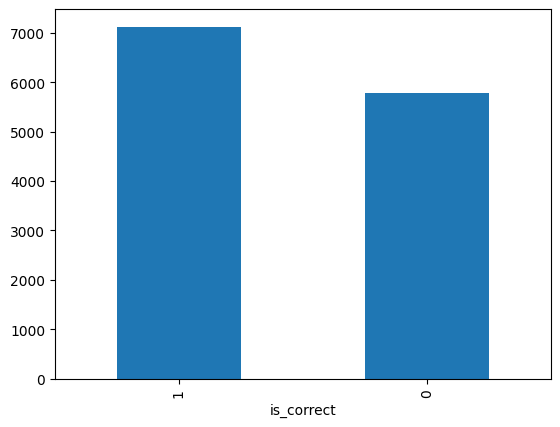

In [97]:
df['is_correct'].value_counts().plot(kind='bar')


In [18]:
df.rename(columns = {'submitted_answer':'text', 'is_correct':'label'}, inplace=True)
df

,text,label
0,SELECT SUM(first_name)\r\nFROM person \r\nWHER...,0
1,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
2,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
3,SELECT COUNT(*) FROM (SELECT person.id FROM pe...,0
4,"SELECT production_year, COUNT(*) FROM movie \r...",1
...,...,...
12894,SELECT count(*) \r\nFROM movie m \r\nWHERE not...,1
12895,;,0
12896,SELECT p.id \r\nFROM person p \r\nWHERE p.year...,1
12897,"select p.first_name, p.last_name, r.title, r.p...",1


# subset(1000)

In [63]:
mini_df = df[0:1000]
mini_df

,text,label
0,SELECT SUM(first_name)\r\nFROM person \r\nWHER...,0
1,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
2,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
3,SELECT COUNT(*) FROM (SELECT person.id FROM pe...,0
4,"SELECT production_year, COUNT(*) FROM movie \r...",1
...,...,...
995,select;\r\n,0
996,"SELECT id,first_name,last_name\r\nFROM PERSON\...",1
997,"SELECT\r\n r.id\r\nFROM\r\n scene s,\r\n...",1
998,"SELECT a.title,a.production_year,b.first_name,...",1


In [64]:

mini_ds = Dataset.from_pandas(mini_df)


In [65]:
mini_ds = mini_ds.train_test_split(test_size=0.2)
mini_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 800
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
})

In [66]:
type(mini_ds)

datasets.dataset_dict.DatasetDict

In [67]:
mini_ds['test'][0]

{'text': 'select id, first_name, last_name\r\nfrom person \r\norder by year_born desc limit 1;',
 'label': 1}

In [19]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Pat\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Pat\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [69]:
tokenizer(mini_ds['train'][0]['text'])

{'input_ids': [101, 7276, 4175, 1006, 1049, 1012, 2516, 1007, 2013, 3185, 1049, 2073, 2025, 6526, 1006, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3185, 1035, 2400, 5003, 2073, 2896, 1006, 5003, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 5003, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 5003, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3626, 1035, 2400, 6187, 2073, 2896, 1006, 6187, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 6187, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 6187, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 2472, 1035, 2400, 4830, 2073, 2896, 1006, 4830, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 4830, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 4830, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3364, 1035, 2400, 9779, 2073, 2896, 1006, 9779, 1012, 2765, 1007, 1027, 1005, 21

In [20]:
def tokenize(batch):
    return tokenizer(batch['text'], truncation=True)

In [71]:
tokenize(mini_ds['train'][:3])

{'input_ids': [[101, 7276, 4175, 1006, 1049, 1012, 2516, 1007, 2013, 3185, 1049, 2073, 2025, 6526, 1006, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3185, 1035, 2400, 5003, 2073, 2896, 1006, 5003, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 5003, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 5003, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3626, 1035, 2400, 6187, 2073, 2896, 1006, 6187, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 6187, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 6187, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 2472, 1035, 2400, 4830, 2073, 2896, 1006, 4830, 1012, 2765, 1007, 1027, 1005, 2180, 1005, 1998, 4830, 1012, 2516, 1027, 1049, 1012, 2516, 1998, 4830, 1012, 2537, 1035, 2095, 1027, 1049, 1012, 2537, 1035, 2095, 2586, 7276, 2516, 1010, 2537, 1035, 2095, 2013, 3364, 1035, 2400, 9779, 2073, 2896, 1006, 9779, 1012, 2765, 1007, 1027, 1005, 2

In [72]:
tokenized_mini_ds = mini_ds.map(tokenize, batched=True)
tokenized_mini_ds

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 800
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
})

In [21]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

In [22]:
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)


In [23]:
id2label = {0: "negative", 1: "positive"}  
label2id = {"negative": 0, "positive": 1}


In [24]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
from transformers import TrainingArguments

finetuned_model_name = 'distilbert-base-uncased-finetuned-sql-classification'
batch_size = 4

training_args = TrainingArguments(
    output_dir=finetuned_model_name,
    num_train_epochs=5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

In [78]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_mini_ds['train'],
    eval_dataset=tokenized_mini_ds['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [79]:
preds_output = trainer.predict(tokenized_mini_ds['test'])
preds_output.metrics

{'test_loss': 0.6879749894142151,
 'test_accuracy': 0.55,
 'test_runtime': 0.514,
 'test_samples_per_second': 389.097,
 'test_steps_per_second': 97.274}

In [81]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.867337,0.800000
2,No log,0.676578,0.800000
3,0.413200,0.770640,0.815000
4,0.413200,0.862585,0.810000
5,0.203300,0.913803,0.800000


TrainOutput(global_step=1000, training_loss=0.3082433242797852, metrics={'train_runtime': 30.0229, 'train_samples_per_second': 133.231, 'train_steps_per_second': 33.308, 'total_flos': 89160908311008.0, 'train_loss': 0.3082433242797852, 'epoch': 5.0})

In [25]:
# from huggingface_hub import notebook_login
 
# notebook_login()

# subset 5000

In [100]:
mini_df = df[0:5000]
mini_ds = Dataset.from_pandas(mini_df)
mini_ds = mini_ds.train_test_split(test_size=0.2)

tokenized_mini_ds = mini_ds.map(tokenize, batched=True)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [101]:

finetuned_model_name = 'distilbert-base-uncased-finetuned-sql-classification'
batch_size = 4

training_args = TrainingArguments(
    output_dir=finetuned_model_name,
    num_train_epochs=5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_mini_ds['train'],
    eval_dataset=tokenized_mini_ds['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

preds_output = trainer.predict(tokenized_mini_ds['test'])
preds_output.metrics

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.520100,0.562982,0.833000
2,0.444100,0.410804,0.869000
3,0.363000,0.443829,0.888000
4,0.304000,0.479316,0.888000
5,0.263600,0.474138,0.898000


Checkpoint destination directory distilbert-base-uncased-finetuned-sql-classification\checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=5000, training_loss=0.38325163269042967, metrics={'train_runtime': 140.6039, 'train_samples_per_second': 142.244, 'train_steps_per_second': 35.561, 'total_flos': 510106079685456.0, 'train_loss': 0.38325163269042967, 'epoch': 5.0})

# Whole Dataset

In [25]:
ds = Dataset.from_pandas(df)
ds = ds.train_test_split(test_size=0.2)

tokenized_ds = ds.map(tokenize, batched=True)

Map:   0%|          | 0/10317 [00:00<?, ? examples/s]

Map:   0%|          | 0/2580 [00:00<?, ? examples/s]

In [17]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 10317
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 2580
    })
})

In [26]:
finetuned_model_name = 'bert-base-uncased-finetuned-sql-classification-no_context'
batch_size = 8

training_args = TrainingArguments(
    output_dir=finetuned_model_name,
    num_train_epochs=5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_ds['train'],
    eval_dataset=tokenized_ds['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

preds_output = trainer.predict(tokenized_ds['test'])
preds_output.metrics

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.496900,0.460844,0.812403
2,0.430800,0.373947,0.854651
3,0.401800,0.435608,0.855039
4,0.330800,0.375380,0.868605
5,0.340300,0.419753,0.879070


TrainOutput(global_step=6450, training_loss=0.3982023230264353, metrics={'train_runtime': 500.3958, 'train_samples_per_second': 103.088, 'train_steps_per_second': 12.89, 'total_flos': 3666607236964380.0, 'train_loss': 0.3982023230264353, 'epoch': 5.0})

In [27]:
from huggingface_hub import notebook_login

notebook_login()

In [28]:
trainer.push_to_hub()


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/PatWang/bert-base-uncased-finetuned-sql-classification-no_context/commit/0aa6c07dc41875a21c7b319133c70dc52c2a5626', commit_message='End of training', commit_description='', oid='0aa6c07dc41875a21c7b319133c70dc52c2a5626', pr_url=None, pr_revision=None, pr_num=None)

In [29]:
df.head()

,text,label
0,SELECT SUM(first_name)\r\nFROM person \r\nWHER...,0
1,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
2,SELECT COUNT(*) FROM (SELECT DISTINCT person.i...,1
3,SELECT COUNT(*) FROM (SELECT person.id FROM pe...,0
4,"SELECT production_year, COUNT(*) FROM movie \r...",1


# Test result from different schemas

In [3]:
import pandas as pd

In [4]:
df = pd.read_json('sql_create_context_v4.json')

In [5]:
df

,question,context,answer
0,How many heads of the departments are older th...,CREATE TABLE head (age INTEGER),SELECT COUNT(*) FROM head WHERE age > 56
1,"List the name, born state and age of the heads...","CREATE TABLE head (name VARCHAR, born_state VA...","SELECT name, born_state, age FROM head ORDER B..."
2,"List the creation year, name and budget of eac...","CREATE TABLE department (creation VARCHAR, nam...","SELECT creation, name, budget_in_billions FROM..."
3,What are the maximum and minimum budget of the...,CREATE TABLE department (budget_in_billions IN...,"SELECT MAX(budget_in_billions), MIN(budget_in_..."
4,What is the average number of employees of the...,CREATE TABLE department (num_employees INTEGER...,SELECT AVG(num_employees) FROM department WHER...
...,...,...,...
78572,What time was the match played with a score of...,"CREATE TABLE table_name_35 (time VARCHAR, scor...","SELECT time FROM table_name_35 WHERE score = ""..."
78573,On which ground did the team play Aston Villa?,"CREATE TABLE table_name_83 (ground VARCHAR, op...",SELECT ground FROM table_name_83 WHERE opponen...
78574,What kind of competition was it at San Siro at...,CREATE TABLE table_name_60 (competition VARCHA...,SELECT competition FROM table_name_60 WHERE gr...
78575,What is the total number of decile for the red...,"CREATE TABLE table_name_34 (decile VARCHAR, na...",SELECT COUNT(decile) FROM table_name_34 WHERE ...


In [6]:
df = df.drop('question', axis='columns').drop('context', axis='columns')

In [7]:
df

,answer
0,SELECT COUNT(*) FROM head WHERE age > 56
1,"SELECT name, born_state, age FROM head ORDER B..."
2,"SELECT creation, name, budget_in_billions FROM..."
3,"SELECT MAX(budget_in_billions), MIN(budget_in_..."
4,SELECT AVG(num_employees) FROM department WHER...
...,...
78572,"SELECT time FROM table_name_35 WHERE score = ""..."
78573,SELECT ground FROM table_name_83 WHERE opponen...
78574,SELECT competition FROM table_name_60 WHERE gr...
78575,SELECT COUNT(decile) FROM table_name_34 WHERE ...


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.insert(1, 'labels', [1] * len(df), True)

In [13]:
# Use a pipeline as a high-level helper

from transformers import pipeline

pipe = pipeline("text-classification", model="PatWang/bert-base-uncased-finetuned-sql-classification-no_context")

In [15]:
df['answer'][1]

'SELECT name, born_state, age FROM head ORDER BY age'

In [43]:
df_test = df.iloc[:1000]

In [44]:
predictions = []

for i in range(1000):
    text = df_test.iloc[i]['answer']
    pred = pipe(text)
    predictions.append(pred)

df_test['pred'] = predictions

C:\Users\Pat\AppData\Local\Temp\ipykernel_25572\4201186193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred'] = predictions


In [46]:
df_test['predicted_label'] = df_test['pred'].apply(lambda x: 1 if x[0]['label'] == 'positive' else 0)

df_test

C:\Users\Pat\AppData\Local\Temp\ipykernel_25572\2321545445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_label'] = df_test['pred'].apply(lambda x: 1 if x[0]['label'] == 'positive' else 0)


,answer,labels,pred,predicted_label
0,SELECT COUNT(*) FROM head WHERE age > 56,1,"[{'label': 'negative', 'score': 0.987013399600...",0
1,"SELECT name, born_state, age FROM head ORDER B...",1,"[{'label': 'negative', 'score': 0.987015485763...",0
2,"SELECT creation, name, budget_in_billions FROM...",1,"[{'label': 'negative', 'score': 0.987012803554...",0
3,"SELECT MAX(budget_in_billions), MIN(budget_in_...",1,"[{'label': 'negative', 'score': 0.987007439136...",0
4,SELECT AVG(num_employees) FROM department WHER...,1,"[{'label': 'negative', 'score': 0.987006068229...",0
...,...,...,...,...
995,SELECT Sponsor_name FROM player WHERE Residenc...,1,"[{'label': 'negative', 'score': 0.987012922763...",0
996,SELECT Player_name FROM player ORDER BY Votes ...,1,"[{'label': 'negative', 'score': 0.987008988857...",0
997,"SELECT Occupation, COUNT(*) FROM player GROUP ...",1,"[{'label': 'negative', 'score': 0.987013936042...",0
998,SELECT Occupation FROM player GROUP BY Occupat...,1,"[{'label': 'negative', 'score': 0.987008631229...",0


In [47]:
# PatWang/distilbert-base-uncased-finetuned-sql-classification-no_context 8.3%

#PatWang/bert-base-uncased-finetuned-sql-classification-no_context
correct_predictions = (df_test['labels'] == df_test['predicted_label']).sum()

accuracy = correct_predictions / len(df_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.061


# Interpreting BERT Models

In [48]:
from transformers import AutoTokenizer

# load tokenizer
model_name = "PatWang/bert-base-uncased-finetuned-sql-classification-no_context"
tokenizer = AutoTokenizer.from_pretrained(model_name)

text = 'SELECT COUNT(*) FROM head WHERE age > 56'
text_ids = tokenizer.encode(text, add_special_tokens=True)

print('tokens:', tokenizer.convert_ids_to_tokens(text_ids))
print('ids:', text_ids)



tokens: ['[CLS]', 'select', 'count', '(', '*', ')', 'from', 'head', 'where', 'age', '>', '56', '[SEP]']
ids: [101, 7276, 4175, 1006, 1008, 1007, 2013, 2132, 2073, 2287, 1028, 5179, 102]


In [184]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)


In [49]:
from transformers import AutoModelForSequenceClassification
# load model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

embeddings = model.embeddings(torch.tensor([text_ids]))
print(embeddings.size())

# # find embeddings
# inputs = tokenizer(text, return_tensors='pt')
# outputs = model(**inputs, output_hidden_states=True)
# last_hidden_states = outputs.hidden_states[-1]



AttributeError: 'BertForSequenceClassification' object has no attribute 'embeddings'

In [5]:
last_hidden_states.size()

torch.Size([1, 13, 768])

In [6]:
# specify model architecture
from torch import nn

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask = None):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [7]:
#load model parameters
model = BertClassifier()
#model.load_state_dict(torch.load('path/to/bert_model.pt', map_location=torch.device('cpu')))
model.eval()

BertClassifier(
  (bert): DistilBertForSequenceClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (f

In [11]:
import torch
import torch.nn as nn

from captum.attr import IntegratedGradients
from captum.attr import InterpretableEmbeddingBase, TokenReferenceBase
from captum.attr import visualization
from captum.attr import configure_interpretable_embedding_layer, remove_interpretable_embedding_layer




# We need to split forward pass into two part: 
# 1) embeddings computation
# 2) classification

def compute_bert_outputs(model_bert, embedding_output, attention_mask=None, head_mask=None):
    if attention_mask is None:
        attention_mask = torch.ones(embedding_output.shape[0], embedding_output.shape[1]).to(embedding_output)

    extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

    extended_attention_mask = extended_attention_mask.to(dtype=next(model_bert.parameters()).dtype) # fp16 compatibility
    extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

    if head_mask is not None:
        if head_mask.dim() == 1:
            head_mask = head_mask.unsqueeze(0).unsqueeze(0).unsqueeze(-1).unsqueeze(-1)
            head_mask = head_mask.expand(model_bert.config.num_hidden_layers, -1, -1, -1, -1)
        elif head_mask.dim() == 2:
            head_mask = head_mask.unsqueeze(1).unsqueeze(-1).unsqueeze(-1)  # We can specify head_mask for each layer
        head_mask = head_mask.to(dtype=next(model_bert.parameters()).dtype) # switch to fload if need + fp16 compatibility
    else:
        head_mask = [None] * model_bert.config.num_hidden_layers

    encoder_outputs = model_bert.encoder(embedding_output,
                                         extended_attention_mask,
                                         head_mask=head_mask)
    sequence_output = encoder_outputs[0]
    pooled_output = model_bert.pooler(sequence_output)
    outputs = (sequence_output, pooled_output,) + encoder_outputs[1:]  # add hidden_states and attentions if they are here
    return outputs  # sequence_output, pooled_output, (hidden_states), (attentions)    


class BertModelWrapper(nn.Module):
    
    def __init__(self, model):
        super(BertModelWrapper, self).__init__()
        self.model = model
        
    def forward(self, embeddings):        
        outputs = compute_bert_outputs(self.model.bert, embeddings)
        pooled_output = outputs[1]
        pooled_output = self.model.dropout(pooled_output)
        logits = self.model.classifier(pooled_output)
        return torch.softmax(logits, dim=1)[:, 1].unsqueeze(1)

    
bert_model_wrapper = BertModelWrapper(model)
ig = IntegratedGradients(bert_model_wrapper)

# accumalate couple samples in this array for visualization purposes
vis_data_records_ig = []

def interpret_sentence(model_wrapper, sentence, label=1):

    model_wrapper.eval()
    model_wrapper.zero_grad()
    
    input_ids = torch.tensor([tokenizer.encode(sentence, add_special_tokens=True)])
    input_embedding = model_wrapper.model.bert.embeddings(input_ids)
    
    # predict
    pred = model_wrapper(input_embedding).item()
    pred_ind = round(pred)

    # compute attributions and approximation delta using integrated gradients
    attributions_ig, delta = ig.attribute(input_embedding, n_steps=500, return_convergence_delta=True)

    print('pred: ', pred_ind, '(', '%.2f' % pred, ')', ', delta: ', abs(delta))

    tokens = tokenizer.convert_ids_to_tokens(input_ids[0].numpy().tolist())    
    add_attributions_to_visualizer(attributions_ig, tokens, pred, pred_ind, label, delta, vis_data_records_ig)
    
    
def add_attributions_to_visualizer(attributions, tokens, pred, pred_ind, label, delta, vis_data_records):
    attributions = attributions.sum(dim=2).squeeze(0)
    attributions = attributions / torch.norm(attributions)
    attributions = attributions.detach().numpy()
    
    # storing couple samples in an array for visualization purposes
    vis_data_records.append(visualization.VisualizationDataRecord(
                            attributions,
                            pred,
                            pred_ind,
                            label,
                            "label",
                            attributions.sum(),       
                            tokens[:len(attributions)],
                            delta))    

interpret_sentence(bert_model_wrapper, sentence="text to classify", label=0)
visualization.visualize_text(vis_data_records_ig)

AttributeError: 'DistilBertForSequenceClassification' object has no attribute 'embeddings'